<a href="https://colab.research.google.com/github/Hardo125/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pokemon Classification

Authors: Hardo Niit, Hans Erik Atonen, Kelli Kukk, Annika Altoja

**The aim of this project is to consolidate our knowledges in machine learning.**

In our project we try to find out is it possible to identify type of Pokemon based on its stats (e.g. Attack, Defense) and is it possible to identify whether Pokemon is legendary or not.

First we analyse data to see what types, how many etc. Pokemons we have in our data. Secondly we try to build and train models for classification and assess how good these models are.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

!pip install plotnine
from plotnine import *

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon.csv


In [3]:
import io
poke_data = pd.read_csv(io.BytesIO(uploaded['Pokemon.csv']))
poke_data['Type 1'] = poke_data['Type 1'].astype('category')
poke_data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


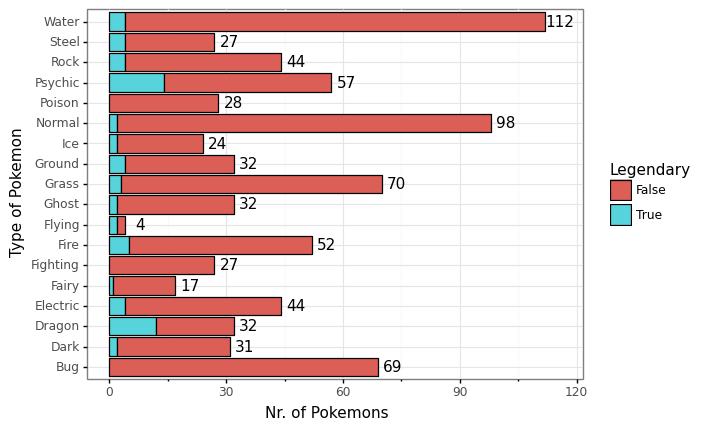

<ggplot: (-9223363272266511991)>

In [4]:
(
  ggplot(poke_data)
    + geom_bar(aes(x='Type 1', fill = 'Legendary'), colour='black')
    + geom_text(aes(x='Type 1', label = 'stat(count)'), stat = 'count', nudge_y = 3.8)
    + ylab("Nr. of Pokemons")
    + xlab("Type of Pokemon")
    + coord_flip()
    + theme_bw()
)

Figure 1. Histogram of Pokemon count in each type that also shows legendary status.

From Figure 1 we can see the count in each type class. We can see that most popular classes are water and normal containing 210 Pokemons which is a little bit over 1/4 of all Pokemons in data set. Most 'unpopular' class is flying containing only 4 Pokemons.

From Figure 1 we can also see that there is not too much legendary Pokemons, but it is expected, because in any game there is not too many legendary, overpowered or all mighty characters.

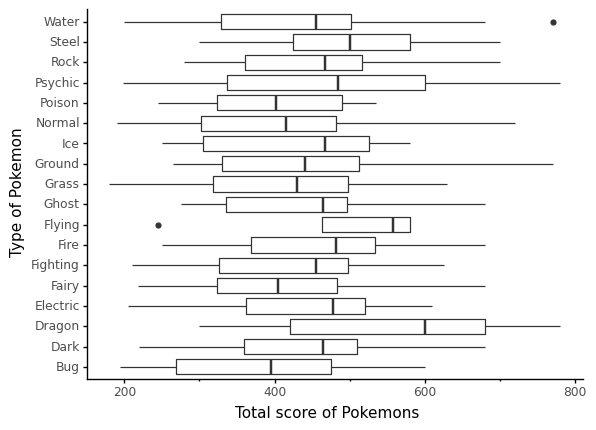

<ggplot: (8764584518383)>

In [5]:
(
  ggplot(poke_data, aes(x='Type 1', y='Total'))
    + geom_boxplot()
    + ylab("Total score of Pokemons")
    + xlab("Type of Pokemon")
    + coord_flip()
    + theme_classic()
)

Figure 2. Boxplot of each pokemon type's total score.

From Figure 2 we can see the distribution of Pokemon's total scores by Type 1. From Figure 2 we can see that class Dargon is more powerful than others. Other classes are more or less equal. For all classes the variety of total scores are quite large.

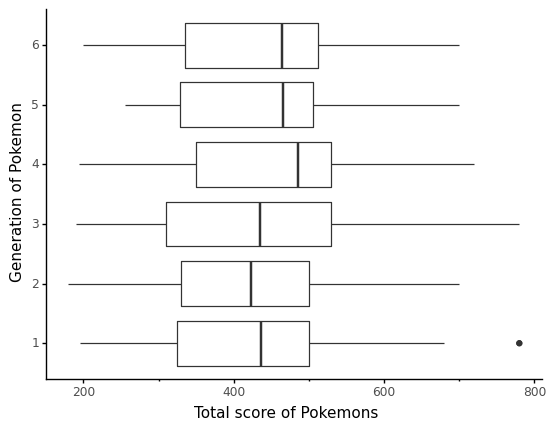

<ggplot: (8764584444592)>

In [6]:
(
  ggplot(poke_data, aes(x='factor(Generation)', y='Total'))
    + geom_boxplot()
    + ylab("Total score of Pokemons")
    + xlab("Generation of Pokemon")
    + coord_flip()
    + theme_classic()
)

Figure 3. Boxplot of each generation's Pokemon total score

From Figure 3 we can see that by generations Pokemons have pretty equal total scores.

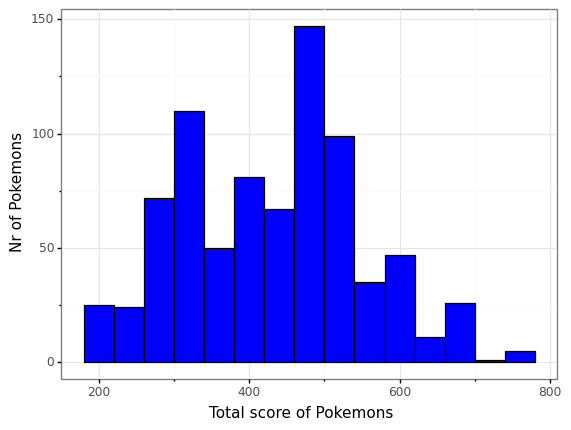

<ggplot: (8764584388479)>

In [7]:
(
  ggplot(poke_data, aes(x='Total'))
    + geom_histogram(y='stat(count)', binwidth=40, colour='black', fill = 'blue')
    + xlab("Total score of Pokemons")
    + ylab("Nr of Pokemons")
    + theme_bw()
)

Figure 4. Histogram of Pokemon's total score.

From Figure 4 we can see distribution of Pokemons by them total scores. We can see that higher concentrations of total scores are around 300 and 500. 

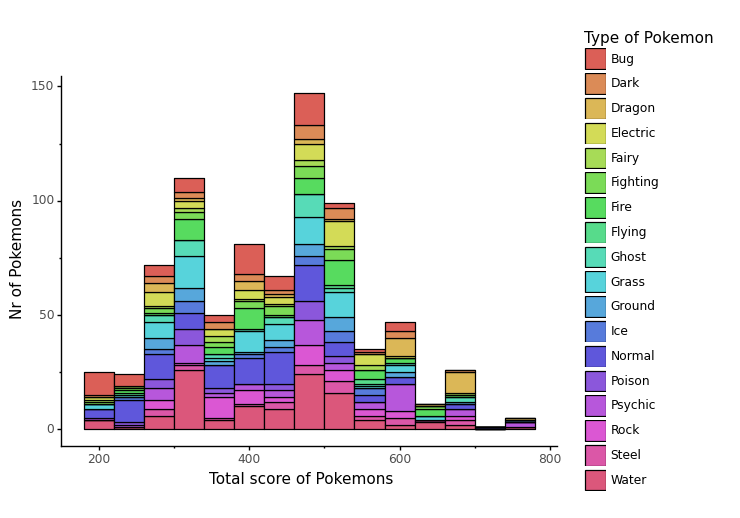

<ggplot: (8764584388044)>

In [8]:
(
    ggplot(poke_data, aes(x='Total', y='stat(count)', fill='Type 1'))
    + geom_histogram(binwidth=40, colour='black')
    + scale_fill_discrete(name = "Type of Pokemon")
    + xlab("Total score of Pokemons")
    + ylab("Nr of Pokemons")
    + theme_classic()
)

Figure 5. Histogram of Pokemon's total score that also shows pokemon's type.

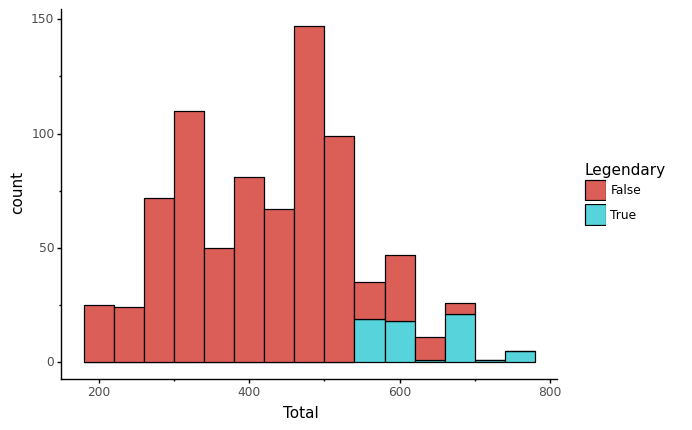

<ggplot: (8764584431308)>

In [9]:
(
    ggplot(poke_data, aes(x='Total', y='stat(count)',fill='Legendary'))
    + geom_histogram(binwidth=40, colour='black')
    + theme_classic()
)

Figure 6. Histogram of Pokemon's total score that also shows legendary status.

From Figure 6 we can see that compare to non-legendary Pokemons legendary ones have higher total scores which is expected, because usually legendary status shows that character is more powerful than others.

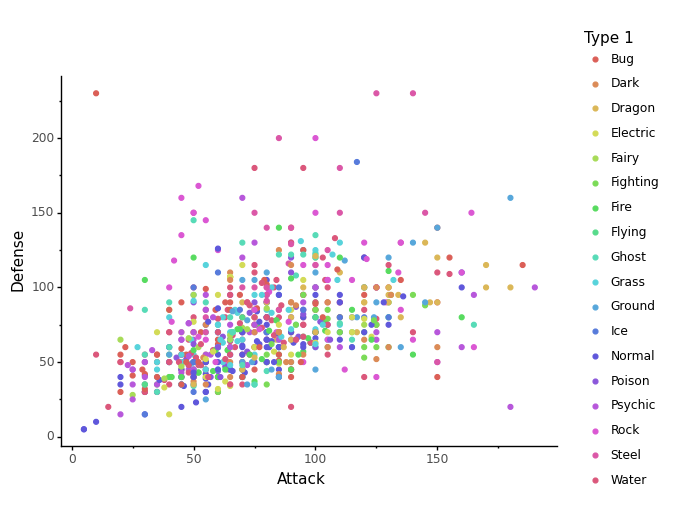

<ggplot: (8764584549829)>

In [10]:
(
  ggplot(poke_data, aes(x='Attack', y='Defense'))
    + geom_point(aes(color='Type 1'))
    + scale_fill_discrete(name = "Type of Pokemon")
    + labs(x='Attack', y='Defense')
    + theme_classic()
)

Figure 7. Scatterplot of each Pokemon's attack and defense.

From Figure 7 we can see how each Pokemon's attack and defense is related. We expected that higher the attack then higher the defense of Pokemon, but we can see that it does not hold. 

In [11]:
Legendary_pokes = poke_data[poke_data['Legendary'] == True]

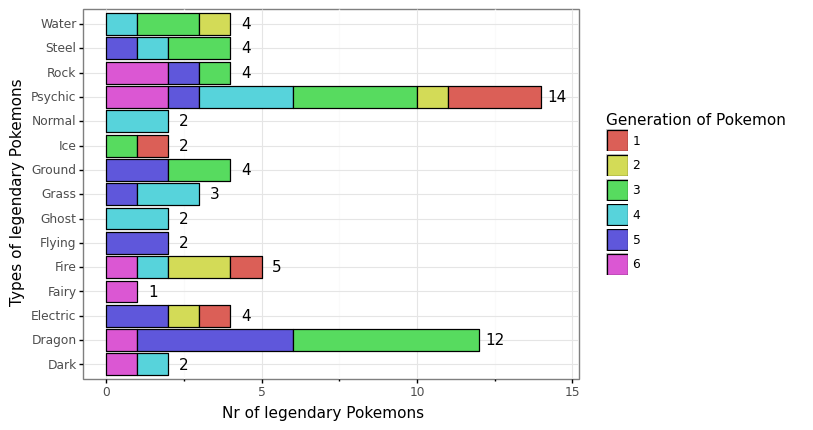

<ggplot: (-9223363272270463214)>

In [12]:
(
  ggplot(Legendary_pokes)
    + geom_bar(aes(x='Type 1', fill = 'factor(Generation)'), colour='black')
    + geom_text(aes(x='Type 1', label = 'stat(count)'), stat = 'count', nudge_y = 0.5)
    + ylab("Nr of legendary Pokemons")
    + xlab("Types of legendary Pokemons")
    + scale_fill_discrete(name = "Generation of Pokemon")
    + coord_flip()
    + theme_bw()
)

Figure 8. Histogram of legendary Pokemon's type.

From figure 8 we can see that types with most legendary Pokemons are Psychic and Dragon both containing more than 10 legendary Pokemons. Also we can see that generation 3 contains most legendary Pokemons.

In [13]:
print(f'Minimum total score for legendary Pokemon is {min(Legendary_pokes["Total"])}')
print(f'Nr of non-legendary Pokemons whose total score is equal or bigger than minimal total score for legendary Pokemon {poke_data[np.logical_and(poke_data.Total >= 580, poke_data.Legendary == False)].shape[0]}')
print(f'Nr of legendary pokemons in dataset is {Legendary_pokes.shape[0]} and it is {Legendary_pokes.shape[0]/poke_data.shape[0]*100}% from all Pokemons')

Minimum total score for legendary Pokemon is 580
Nr of non-legendary Pokemons whose total score is equal or bigger than minimal total score for legendary Pokemon 48
Nr of legendary pokemons in dataset is 65 and it is 8.125% from all Pokemons


By using techniques and models learned during the course we try to predict Pokemon's type and whether a Pokemon is legendary or not.

For that we use couple of functions introduced in practice sessions.

In [14]:
def generate_coordinates(scores, classes, verbose = True):
  # thresholds can be obtained from scores
  thresholds = scores.unique()
  
  # initialise roc_coordinates
  roc_coordinates = pd.DataFrame(columns=['FPR','TPR'], index=thresholds)
  
  ##### YOUR CODE STARTS #####
  for threshold in thresholds:
    if (verbose == True):
      print(f'For threshold {threshold}')
    
    predictions = (scores >= threshold).to_numpy().flatten()
    pred_positive = classes[predictions == 1].to_numpy().flatten()
    pred_negative = classes[predictions == 0].to_numpy().flatten()
    
    tp = np.sum(pred_positive == 1)
    fn = np.sum(pred_negative == 1)
    tn = np.sum(pred_negative == 0)
    fp = np.sum(pred_positive == 0)
    
    if (verbose == True):
      print(f'tp = {tp}, fn = {fn}, tn = {tn}, fp = {fp}')
    
    tpr = tp/(tp + fn) # the same as recall
    fpr = fp/(tn + fp)
    
    if (verbose == True):
      print(f'FPR = {np.round(fpr, 2)}, TPR = {np.round(tpr, 2)}\n')
    roc_coordinates.loc[threshold] = pd.Series({'FPR':np.round(fpr, 2), 'TPR':np.round(tpr, 2)})

  ##### YOUR CODE ENDS #####
  return roc_coordinates

def plot_roc(coordinates_dict):
  """
  plot_roc function plots all models' ROCs on one plot
  """
  plotting_data = pd.DataFrame(columns=['FPR', 'TPR', 'Method'])

  for id, name in enumerate(coordinates_dict.keys()):
    method_data = coordinates_dict[name]
    method_data['Method'] = name
    plotting_data = pd.concat([plotting_data, method_data])
  
  plotting_data['Method'] = pd.Categorical(plotting_data['Method'])
  
  # To those of you who are interested in what the hell is going on
  # check the comments for each line:
  roc_plot = (
        ggplot(data = plotting_data, # creates a canvas
        mapping = aes(x = 'FPR', y = 'TPR', colour = 'Method')) + # specifies dimensions
        geom_path(size = 1.5) + # determines geometric primitive to be visualised (path/line in our case) and its thickness 
        labs(title ='', x = 'FPR', y = 'TPR') + # labels of the x and y axes
        # this is all for the figure, beloow are only formatting specs
        theme_bw() + # colour schema 
        theme(figure_size = (5, 5), # figure size
              axis_line = element_line(size = 0.5, colour = "black"), 
              panel_grid_major = element_line(size = 0.05, colour = "black"),
              panel_grid_minor = element_line(size = 0.05, colour = "black"),
              axis_text = element_text(colour ='black')) # more formatting details 
      )
  return roc_plot

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve

poke_train, poke_test = train_test_split(poke_data, random_state = 111, test_size = 0.1) 

Since two common models that we used during the course were decision tree and KNN then we wanted to try to find the optimal parameter for these models.

First let's try to find an optimal parameter for the decision tree classifier trying to predict the Pokemon's type.

In [41]:
max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]

Accuracys = np.zeros(len(max_depths))
i = 0
for param in max_depths:
  print(f'Calculating RMSE for {param} tree(s)...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeat functions

  folds_indx = np.concatenate((np.repeat(1, len(poke_train)/4), np.repeat(2, len(poke_train)/4), np.repeat(3, len(poke_train)/4), np.repeat(4, len(poke_train)/4))) 
  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_Accuracys = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    
    # split data into train_X, train_y and val_X, val_y depending on the fold:
    t_loc = np.where((fold_indx+1) != folds_indx)
    v_loc = np.where((fold_indx+1) == folds_indx)
    train_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[t_loc]
    train_y = poke_train[['Type 1']].iloc[t_loc]
    val_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[v_loc]
    val_y = poke_train[['Type 1']].iloc[v_loc]
  
    # train the decision tree with max_depth = param
    dtr=DecisionTreeClassifier(max_depth = param)

    # fit the decision tree on training data
    dtr.fit(train_X, train_y)

    comparison = pd.DataFrame(columns=['Type 1'])

    # predict validation data
    comparison['Type 1'] = dtr.predict(val_X)
    
    # calculate RMSE for this fold
    accuracy_of_fold = np.sum(val_y.reset_index(drop=True) == comparison.reset_index(drop=True))/val_y.shape[0]
    fold_Accuracys[fold_indx] = accuracy_of_fold
  Accuracys[i] = np.mean(fold_Accuracys)
  i += 1
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation Accuracy for {param} of trees is {np.mean(fold_Accuracys)}')

Calculating RMSE for 1 tree(s)...
Average validation Accuracy for 1 of trees is 0.1625
Calculating RMSE for 2 tree(s)...
Average validation Accuracy for 2 of trees is 0.17638888888888887
Calculating RMSE for 5 tree(s)...
Average validation Accuracy for 5 of trees is 0.1875
Calculating RMSE for 8 tree(s)...
Average validation Accuracy for 8 of trees is 0.18611111111111112
Calculating RMSE for 9 tree(s)...
Average validation Accuracy for 9 of trees is 0.1708333333333333
Calculating RMSE for 10 tree(s)...
Average validation Accuracy for 10 of trees is 0.17222222222222222
Calculating RMSE for 11 tree(s)...
Average validation Accuracy for 11 of trees is 0.16944444444444445
Calculating RMSE for 12 tree(s)...
Average validation Accuracy for 12 of trees is 0.18194444444444444
Calculating RMSE for 13 tree(s)...
Average validation Accuracy for 13 of trees is 0.16527777777777777
Calculating RMSE for 15 tree(s)...
Average validation Accuracy for 15 of trees is 0.1833333333333333
Calculating RMSE f

Text(0.5, 0, 'Depth of tree')

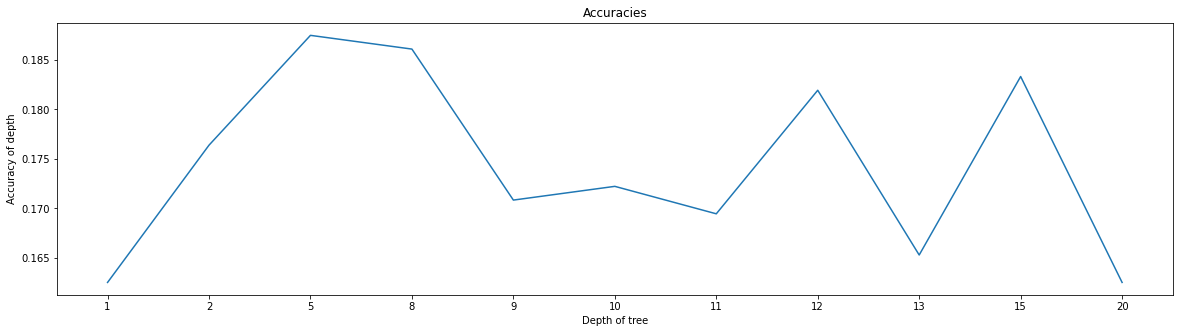

In [42]:
plt.rcParams['figure.figsize'] = 20, 5
plt.plot(Accuracys)
plt.title("Accuracies")
plt.xticks(ticks=[i for i in range(len(max_depths))], labels=max_depths)
plt.ylabel("Accuracy of depth")
plt.xlabel("Depth of tree")

We ran the code multiple times and here is the last result. From the results we saw that for each parameter the accuracy was quite volatile and without setting a seed an optimal parameter was not that obvious to us. Because of this we decided to use the default parameter.

Now let's try to find an optimal parameter for the decision tree model trying to predict whether the Pokemon is legendary or not.

In [43]:
max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]

Accuracys = np.zeros(len(max_depths))
i = 0
for param in max_depths:
  print(f'Calculating RMSE for {param} tree(s)...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeat functions

  folds_indx = np.concatenate((np.repeat(1, len(poke_train)/4), np.repeat(2, len(poke_train)/4), np.repeat(3, len(poke_train)/4), np.repeat(4, len(poke_train)/4))) 
  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_Accuracys = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    
    # split data into train_X, train_y and val_X, val_y depending on the fold:
    t_loc = np.where((fold_indx+1) != folds_indx)
    v_loc = np.where((fold_indx+1) == folds_indx)
    train_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[t_loc]
    train_y = poke_train[['Legendary']].iloc[t_loc]
    val_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[v_loc]
    val_y = poke_train[['Legendary']].iloc[v_loc]
    train_y = train_y.astype('int')
    # train the decision tree with max_depth = param
    dtr=DecisionTreeClassifier(max_depth = param)

    # fit the decision tree on training data
    dtr.fit(train_X, train_y)

    comparison = pd.DataFrame(columns=['Legendary'])

    # predict validation data
    comparison['Legendary'] = dtr.predict(val_X)
    
    # calculate RMSE for this fold
    accuracy_of_fold = np.sum(val_y.reset_index(drop=True) == comparison.reset_index(drop=True))/val_y.shape[0]
    fold_Accuracys[fold_indx] = accuracy_of_fold
  Accuracys[i] = np.mean(fold_Accuracys)
  i += 1
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation Accuracy for {param} of trees is {np.mean(fold_Accuracys)}')

Calculating RMSE for 1 tree(s)...
Average validation Accuracy for 1 of trees is 0.9222222222222223
Calculating RMSE for 2 tree(s)...
Average validation Accuracy for 2 of trees is 0.9291666666666667
Calculating RMSE for 5 tree(s)...
Average validation Accuracy for 5 of trees is 0.9291666666666667
Calculating RMSE for 8 tree(s)...
Average validation Accuracy for 8 of trees is 0.9222222222222223
Calculating RMSE for 9 tree(s)...
Average validation Accuracy for 9 of trees is 0.9180555555555555
Calculating RMSE for 10 tree(s)...
Average validation Accuracy for 10 of trees is 0.9263888888888889
Calculating RMSE for 11 tree(s)...
Average validation Accuracy for 11 of trees is 0.9208333333333334
Calculating RMSE for 12 tree(s)...
Average validation Accuracy for 12 of trees is 0.9277777777777777
Calculating RMSE for 13 tree(s)...
Average validation Accuracy for 13 of trees is 0.9319444444444445
Calculating RMSE for 15 tree(s)...
Average validation Accuracy for 15 of trees is 0.9361111111111111


Text(0.5, 0, 'Depth of tree')

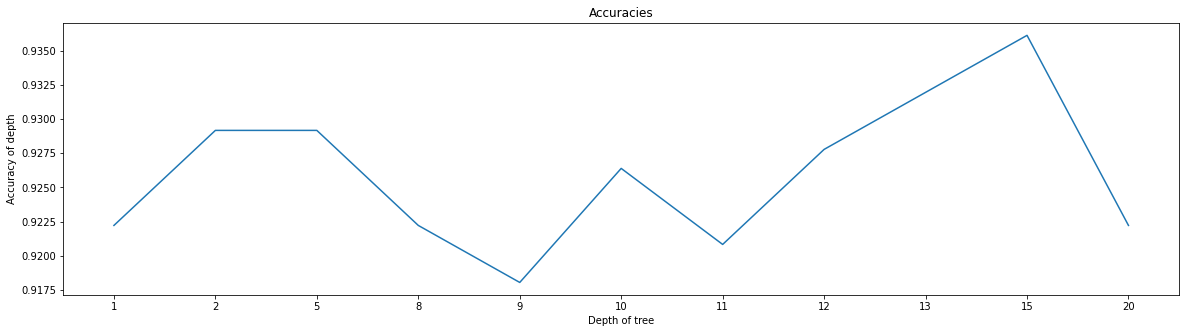

In [44]:
plt.plot(Accuracys)
plt.title("Accuracies")
plt.xticks(ticks=[i for i in range(len(max_depths))], labels=max_depths)
plt.ylabel("Accuracy of depth")
plt.xlabel("Depth of tree")

Just like before we ran the code multiple times and here is the last result. From the results we saw that for each parameter the accuracy was quite volatile and without setting a seed an optimal parameter was not that obvious to us. Because of this we decided to use the default parameter.

Moving on from DT to KNN. Let's try to find an optimal parameter for the KNN model trying to predict the Pokemon's type.

In [45]:
neighbours = [i for i in range(1,41)]

Accuracys = np.zeros(len(neighbours))
i = 0
for param in neighbours:
  print(f'Calculating Acuracy for {param} nearest neighbours...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeat functions

  folds_indx = np.concatenate((np.repeat(1, len(poke_train)/4), np.repeat(2, len(poke_train)/4), np.repeat(3, len(poke_train)/4), np.repeat(4, len(poke_train)/4))) 
  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_Accuracys = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    
    # split data into train_X, train_y and val_X, val_y depending on the fold:
    t_loc = np.where((fold_indx+1) != folds_indx)
    v_loc = np.where((fold_indx+1) == folds_indx)
    train_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[t_loc]
    train_y = poke_train[['Type 1']].iloc[t_loc]
    val_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[v_loc]
    val_y = poke_train[['Type 1']].iloc[v_loc]
  
    # train the decision tree with max_depth = param
    dtr=KNeighborsClassifier(n_neighbors = param)

    # fit the decision tree on training data
    dtr.fit(train_X, train_y)

    comparison = pd.DataFrame(columns=['Type 1'])

    # predict validation data
    comparison['Type 1'] = dtr.predict(val_X)
    
    # calculate RMSE for this fold
    accuracy_of_fold = np.sum(val_y.reset_index(drop=True) == comparison.reset_index(drop=True))/val_y.shape[0]
    fold_Accuracys[fold_indx] = accuracy_of_fold
  Accuracys[i] = np.mean(fold_Accuracys)
  i += 1
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation Accuracy for {param} of nearest neighbors is {np.mean(fold_Accuracys)}')

Calculating Acuracy for 1 nearest neighbours...
Average validation Accuracy for 1 of nearest neighbors is 0.19166666666666665
Calculating Acuracy for 2 nearest neighbours...
Average validation Accuracy for 2 of nearest neighbors is 0.18749999999999997
Calculating Acuracy for 3 nearest neighbours...
Average validation Accuracy for 3 of nearest neighbors is 0.16805555555555557
Calculating Acuracy for 4 nearest neighbours...
Average validation Accuracy for 4 of nearest neighbors is 0.20972222222222223
Calculating Acuracy for 5 nearest neighbours...
Average validation Accuracy for 5 of nearest neighbors is 0.20833333333333334
Calculating Acuracy for 6 nearest neighbours...
Average validation Accuracy for 6 of nearest neighbors is 0.23750000000000002
Calculating Acuracy for 7 nearest neighbours...
Average validation Accuracy for 7 of nearest neighbors is 0.20833333333333334
Calculating Acuracy for 8 nearest neighbours...
Average validation Accuracy for 8 of nearest neighbors is 0.2152777777

Text(0.5, 0, 'Nr of nearest neighbours')

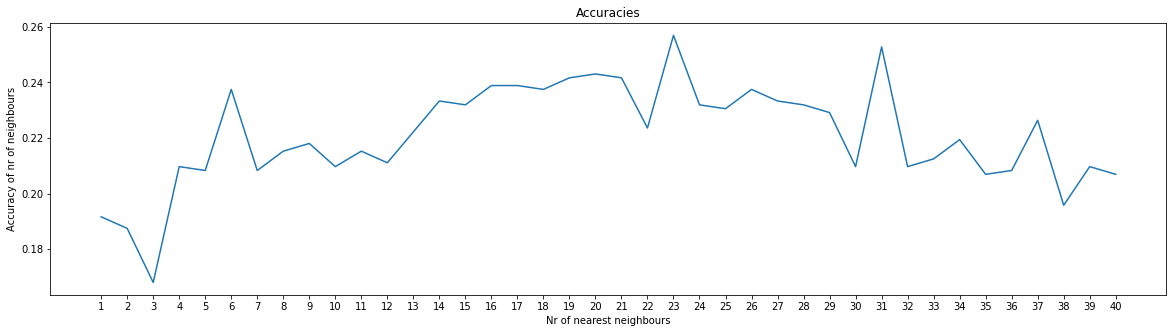

In [46]:
plt.plot(Accuracys)
plt.title("Accuracies")
plt.xticks(ticks=[i for i in range(len(neighbours))], labels=neighbours)
plt.ylabel("Accuracy of nr of neighbours")
plt.xlabel("Nr of nearest neighbours")


Just like for both the DT models the same applies for the first KNN model. we ran the code multiple times and here is the last result. From the results we saw that for each parameter the accuracy was quite volatile and without setting a seed an optimal parameter was not that obvious to us. Because of this we decided to use the default parameter.

Now let's try to find an optimal parameter for the KNN model trying to predict wether or not the pokemon is legendary.

In [47]:
neighbours = [i for i in range(1,41)]

Accuracys = np.zeros(len(neighbours))
i = 0
for param in neighbours:
  print(f'Calculating Acuracy for {param} nearest neighbours...')
  ##### YOUR CODE STARTS #####
  # 4-fold cross validation
  # break training data into 4 equal chunks using np.concatenate and np.repeat functions

  folds_indx = np.concatenate((np.repeat(1, len(poke_train)/4), np.repeat(2, len(poke_train)/4), np.repeat(3, len(poke_train)/4), np.repeat(4, len(poke_train)/4))) 
  # randomly shuffle the indeces
  np.random.shuffle(folds_indx)
  
  # number of folds
  n_folds = 4

  # initialise variable that will hold RMSEs for each fold
  fold_Accuracys = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    
    # split data into train_X, train_y and val_X, val_y depending on the fold:
    t_loc = np.where((fold_indx+1) != folds_indx)
    v_loc = np.where((fold_indx+1) == folds_indx)
    train_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[t_loc]
    train_y = poke_train[['Legendary']].iloc[t_loc]
    val_X = poke_train[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].iloc[v_loc]
    val_y = poke_train[['Legendary']].iloc[v_loc]
  
    # train the decision tree with max_depth = param
    dtr=KNeighborsClassifier(n_neighbors = param)

    # fit the decision tree on training data
    dtr.fit(train_X, train_y)

    comparison = pd.DataFrame(columns=['Legendary'])

    # predict validation data
    comparison['Legendary'] = dtr.predict(val_X)
    
    # calculate RMSE for this fold
    accuracy_of_fold = np.sum(val_y.reset_index(drop=True) == comparison.reset_index(drop=True))/val_y.shape[0]
    fold_Accuracys[fold_indx] = accuracy_of_fold
  Accuracys[i] = np.mean(fold_Accuracys)
  i += 1
    ##### YOUR CODE ENDS ##### (please do not delete this line)

  print(f'Average validation Accuracy for {param} of nearest neighbors is {np.mean(fold_Accuracys)}')

Calculating Acuracy for 1 nearest neighbours...
Average validation Accuracy for 1 of nearest neighbors is 0.936111111111111
Calculating Acuracy for 2 nearest neighbours...
Average validation Accuracy for 2 of nearest neighbors is 0.9402777777777778
Calculating Acuracy for 3 nearest neighbours...
Average validation Accuracy for 3 of nearest neighbors is 0.9472222222222222
Calculating Acuracy for 4 nearest neighbours...
Average validation Accuracy for 4 of nearest neighbors is 0.9430555555555555
Calculating Acuracy for 5 nearest neighbours...
Average validation Accuracy for 5 of nearest neighbors is 0.9402777777777778
Calculating Acuracy for 6 nearest neighbours...
Average validation Accuracy for 6 of nearest neighbors is 0.9486111111111112
Calculating Acuracy for 7 nearest neighbours...
Average validation Accuracy for 7 of nearest neighbors is 0.9444444444444444
Calculating Acuracy for 8 nearest neighbours...
Average validation Accuracy for 8 of nearest neighbors is 0.9402777777777778
C

Text(0.5, 0, 'Nr of nearest neighbours')

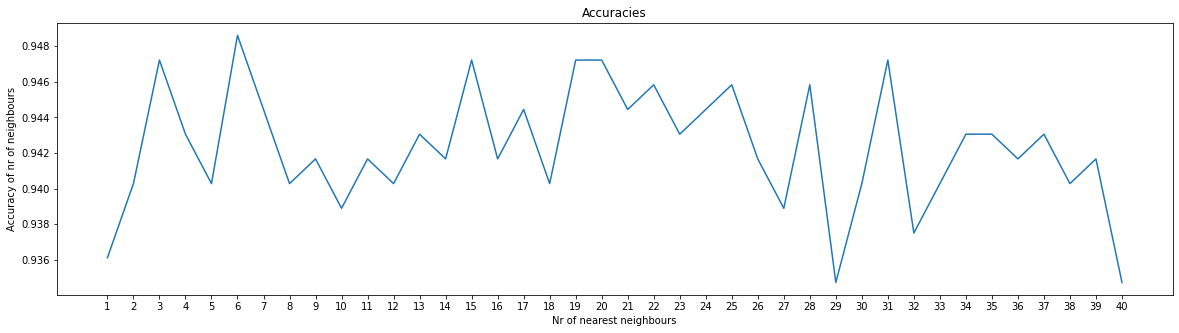

In [48]:
plt.plot(Accuracys)
plt.title("Accuracies")
plt.xticks(ticks=[i for i in range(len(neighbours))], labels=neighbours)
plt.ylabel("Accuracy of nr of neighbours")
plt.xlabel("Nr of nearest neighbours")

Just like for all the models before we ran the code multiple times and here is the last result. From the results we saw that for each parameter the accuracy was quite volatile and without setting a seed an optimal parameter was not that obvious to us. Because of this we decided to use the default parameter.

We tried to find the optimal parameters for DT and KNN but since we couldn't find an optimal one we are going to move forward using the default parameters. Moving forward we will also be using three additional classifiers Logistic regression (LR), Adaboost (Ada) and Random forest (RF). In addition we also tried using an ensemble of models that used a combination of the previous models.

As it seems difficult to pick out one good combination of variables for predicting Pokemon type we predict for every combination and try to find out if any combination stands out.

In [24]:
import itertools
variables_used = ['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
combinations_for_models = [] 
for L in range(1, len(variables_used)+1):
  for subset in itertools.combinations(variables_used, L):
    tmp=[]
    for i in range(len(subset)):
      tmp.append(subset[i])
    combinations_for_models.append(tmp)

In [49]:
DT = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
LR = LogisticRegression()
Ada = AdaBoostClassifier()
RF = RandomForestClassifier()

prediction_scores =  pd.DataFrame(columns=['Combination','KNN', 'DT', 'LR', 'Ada', 'RF', 'Ensemble', 'Ensemble 2'])

for combination in combinations_for_models:
  KNN.fit(poke_train[combination],poke_train[['Type 1']])
  DT.fit(poke_train[combination],poke_train[['Type 1']])
  LR.fit(poke_train[combination],poke_train[['Type 1']])
  Ada.fit(poke_train[combination],poke_train[['Type 1']])
  RF.fit(poke_train[combination],poke_train[['Type 1']])

  predictions_for_combination =  pd.DataFrame(columns=['KNN', 'DT', 'LR', 'Ada', 'RF'])

  predictions_for_combination['KNN'] = KNN.predict(poke_test[combination])
  predictions_for_combination['DT'] = DT.predict(poke_test[combination])
  predictions_for_combination['LR'] = LR.predict(poke_test[combination])
  predictions_for_combination['Ada'] = Ada.predict(poke_test[combination])
  predictions_for_combination['RF'] = RF.predict(poke_test[combination])

  predictions_for_combination['ensemble'] = predictions_for_combination[['KNN', 'DT', 'LR', 'Ada']].mode(axis = 1).iloc[:,0]
  predictions_for_combination['ensemble2'] = predictions_for_combination[['KNN', 'DT', 'LR', 'Ada', 'RF']].mode(axis = 1).iloc[:,0]
  
  KNN_score = KNN.score(poke_test[combination], poke_test['Type 1'])*100
  DT_score = DT.score(poke_test[combination], poke_test['Type 1'])*100
  LR_score = LR.score(poke_test[combination], poke_test['Type 1'])*100
  Ada_score = Ada.score(poke_test[combination], poke_test['Type 1'])*100
  RF_score = RF.score(poke_test[combination], poke_test['Type 1'])*100
  Ensemble_score = (np.sum(predictions_for_combination['ensemble'] == poke_test['Type 1'].reset_index(drop=True))/poke_test.shape[0])*100
  Ensemble_2_score = (np.sum(predictions_for_combination['ensemble2'] == poke_test['Type 1'].reset_index(drop=True))/poke_test.shape[0])*100

  tmp_list = [[combination,KNN_score, DT_score, LR_score, Ada_score, RF_score, Ensemble_score, Ensemble_2_score]]
  tmp_df = pd.DataFrame(tmp_list, columns=['Combination','KNN', 'DT', 'LR', 'Ada', 'RF', 'Ensemble', 'Ensemble 2'])
  prediction_scores = pd.concat([prediction_scores, tmp_df])

  print(f"Accuracies for combination {combination}")
  print(f"Accuracy of KNN {KNN.score(poke_test[combination], poke_test['Type 1'])*100}%")
  print(f"Accuracy of DT {DT.score(poke_test[combination], poke_test['Type 1'])*100}%")
  print(f"Accuracy of LR {LR.score(poke_test[combination], poke_test['Type 1'])*100}%")
  print(f"Accuracy of Ada {Ada.score(poke_test[combination], poke_test['Type 1'])*100}%")
  print(f"Accuracy of RF {RF.score(poke_test[combination], poke_test['Type 1'])*100}%")
  print(f"Accuracy of ensemble of KNN, DT, LR and Ada {(np.sum(predictions_for_combination['ensemble'] == poke_test['Type 1'].reset_index(drop=True))/poke_test.shape[0])*100}%")
  print(f"Accuracy of ensemble of KNN, DT, LR, Ada and RF {(np.sum(predictions_for_combination['ensemble2'] == poke_test['Type 1'].reset_index(drop=True))/poke_test.shape[0])*100}%")
  print('\n')
 

Accuracies for combination ['HP']
Accuracy of KNN 7.5%
Accuracy of DT 13.750000000000002%
Accuracy of LR 10.0%
Accuracy of Ada 13.750000000000002%
Accuracy of RF 16.25%
Accuracy of ensemble of KNN, DT, LR and Ada 12.5%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 15.0%


Accuracies for combination ['Attack']
Accuracy of KNN 10.0%
Accuracy of DT 8.75%
Accuracy of LR 12.5%
Accuracy of Ada 11.25%
Accuracy of RF 6.25%
Accuracy of ensemble of KNN, DT, LR and Ada 13.750000000000002%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 7.5%


Accuracies for combination ['Defense']
Accuracy of KNN 6.25%
Accuracy of DT 5.0%
Accuracy of LR 17.5%
Accuracy of Ada 2.5%
Accuracy of RF 5.0%
Accuracy of ensemble of KNN, DT, LR and Ada 6.25%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 5.0%


Accuracies for combination ['Sp. Atk']
Accuracy of KNN 16.25%
Accuracy of DT 11.25%
Accuracy of LR 17.5%
Accuracy of Ada 13.750000000000002%
Accuracy of RF 11.25%
Accuracy of ensemble of KNN, DT, LR and Ada 13.75

In [50]:
x_cords = [i for i in range(prediction_scores.shape[0])]

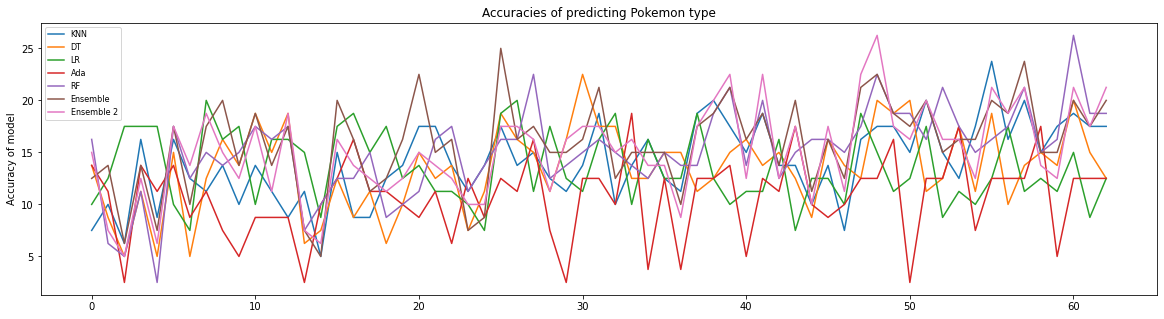

In [51]:
plt.plot(x_cords,prediction_scores['KNN'], label = 'KNN')
plt.plot(x_cords,prediction_scores['DT'], label = 'DT')
plt.plot(x_cords,prediction_scores['LR'], label = 'LR')
plt.plot(x_cords,prediction_scores['Ada'], label = 'Ada')
plt.plot(x_cords,prediction_scores['RF'], label = 'RF')
plt.plot(x_cords,prediction_scores['Ensemble'], label = 'Ensemble')
plt.plot(x_cords,prediction_scores['Ensemble 2'], label = 'Ensemble 2')
plt.title("Accuracies of predicting Pokemon type")
plt.ylabel("Accuracy of model")
plt.legend(loc='best', prop={'size': 8})


As can be seen from the results we can consider RF as the best model at predicting Pokemon type. RF for most of the cases is even better than the ensemble models. But we can see from the result that all of the models predict pretty similarly and randomly it means that for combinations best model is different.

In [52]:
DT = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
LR = LogisticRegression()
Ada = AdaBoostClassifier()
RF = RandomForestClassifier()

prediction_scores =  pd.DataFrame(columns=['Combination','KNN', 'DT', 'LR', 'Ada', 'RF', 'Ensemble', 'Ensemble 2'])

for combination in combinations_for_models:
  KNN.fit(poke_train[combination],poke_train[['Legendary']])
  DT.fit(poke_train[combination],poke_train[['Legendary']])
  LR.fit(poke_train[combination],poke_train[['Legendary']])
  Ada.fit(poke_train[combination],poke_train[['Legendary']])
  RF.fit(poke_train[combination],poke_train[['Legendary']])

  predictions_for_combination =  pd.DataFrame(columns=['KNN', 'DT', 'LR', 'Ada', 'RF'])

  predictions_for_combination['KNN'] = KNN.predict(poke_test[combination])
  predictions_for_combination['DT'] = DT.predict(poke_test[combination])
  predictions_for_combination['LR'] = LR.predict(poke_test[combination])
  predictions_for_combination['Ada'] = Ada.predict(poke_test[combination])
  predictions_for_combination['RF'] = RF.predict(poke_test[combination])

  predictions_for_combination['ensemble'] = predictions_for_combination[['KNN', 'DT', 'LR', 'Ada']].mode(axis = 1).iloc[:,0]
  predictions_for_combination['ensemble2'] = predictions_for_combination[['KNN', 'DT', 'LR', 'Ada', 'RF']].mode(axis = 1).iloc[:,0]
  
  KNN_score = KNN.score(poke_test[combination], poke_test['Legendary'])*100
  DT_score = DT.score(poke_test[combination], poke_test['Legendary'])*100
  LR_score = LR.score(poke_test[combination], poke_test['Legendary'])*100
  Ada_score = Ada.score(poke_test[combination], poke_test['Legendary'])*100
  RF_score = RF.score(poke_test[combination], poke_test['Legendary'])*100
  Ensemble_score = (np.sum(predictions_for_combination['ensemble'] == poke_test['Legendary'].reset_index(drop=True))/poke_test.shape[0])*100
  Ensemble_2_score = (np.sum(predictions_for_combination['ensemble2'] == poke_test['Legendary'].reset_index(drop=True))/poke_test.shape[0])*100

  tmp_list = [[combination,KNN_score, DT_score, LR_score, Ada_score, RF_score, Ensemble_score, Ensemble_2_score]]
  tmp_df = pd.DataFrame(tmp_list, columns=['Combination','KNN', 'DT', 'LR', 'Ada', 'RF', 'Ensemble', 'Ensemble 2'])
  prediction_scores = pd.concat([prediction_scores, tmp_df])

  print(f"Accuracies for combination {combination}")
  print(f"Accuracy of KNN {KNN.score(poke_test[combination], poke_test['Legendary'])*100}%")
  print(f"Accuracy of DT {DT.score(poke_test[combination], poke_test['Legendary'])*100}%")
  print(f"Accuracy of LR {LR.score(poke_test[combination], poke_test['Legendary'])*100}%")
  print(f"Accuracy of Ada {Ada.score(poke_test[combination], poke_test['Legendary'])*100}%")
  print(f"Accuracy of RF {RF.score(poke_test[combination], poke_test['Legendary'])*100}%")
  print(f"Accuracy of ensemble of KNN, DT, LR and Ada {(np.sum(predictions_for_combination['ensemble'] == poke_test['Legendary'].reset_index(drop=True))/poke_test.shape[0])*100}%")
  print(f"Accuracy of ensemble of KNN, DT, LR, Ada and RF {(np.sum(predictions_for_combination['ensemble2'] == poke_test['Legendary'].reset_index(drop=True))/poke_test.shape[0])*100}%")
  print('\n')

Accuracies for combination ['HP']
Accuracy of KNN 86.25%
Accuracy of DT 88.75%
Accuracy of LR 88.75%
Accuracy of Ada 88.75%
Accuracy of RF 88.75%
Accuracy of ensemble of KNN, DT, LR and Ada 88.75%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 88.75%


Accuracies for combination ['Attack']
Accuracy of KNN 90.0%
Accuracy of DT 88.75%
Accuracy of LR 88.75%
Accuracy of Ada 88.75%
Accuracy of RF 88.75%
Accuracy of ensemble of KNN, DT, LR and Ada 88.75%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 88.75%


Accuracies for combination ['Defense']
Accuracy of KNN 83.75%
Accuracy of DT 88.75%
Accuracy of LR 88.75%
Accuracy of Ada 88.75%
Accuracy of RF 88.75%
Accuracy of ensemble of KNN, DT, LR and Ada 88.75%
Accuracy of ensemble of KNN, DT, LR, Ada and RF 88.75%


Accuracies for combination ['Sp. Atk']
Accuracy of KNN 91.25%
Accuracy of DT 91.25%
Accuracy of LR 91.25%
Accuracy of Ada 91.25%
Accuracy of RF 91.25%
Accuracy of ensemble of KNN, DT, LR and Ada 91.25%
Accuracy of ensemble of KNN,

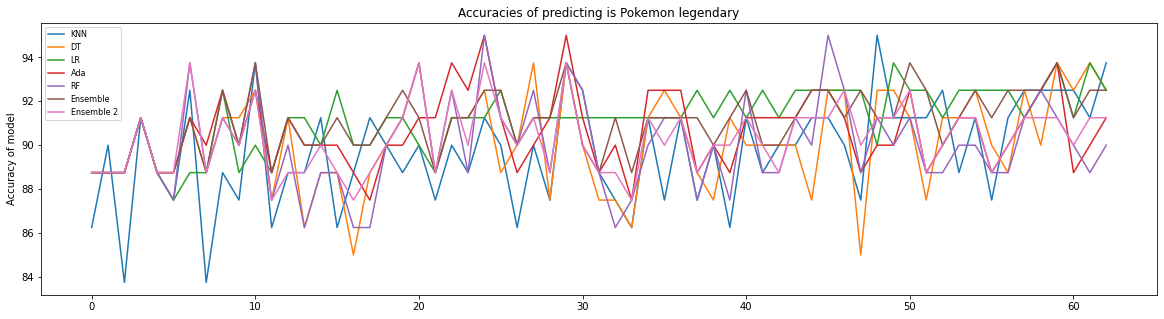

In [53]:
plt.plot(x_cords,prediction_scores['KNN'], label = 'KNN')
plt.plot(x_cords,prediction_scores['DT'], label = 'DT')
plt.plot(x_cords,prediction_scores['LR'], label = 'LR')
plt.plot(x_cords,prediction_scores['Ada'], label = 'Ada')
plt.plot(x_cords,prediction_scores['RF'], label = 'RF')
plt.plot(x_cords,prediction_scores['Ensemble'], label = 'Ensemble')
plt.plot(x_cords,prediction_scores['Ensemble 2'], label = 'Ensemble 2')
plt.title("Accuracies of predicting is Pokemon legendary")
plt.ylabel("Accuracy of model")
plt.legend(loc='best', prop={'size': 8})

All of these models are seemingly very accurate. All of them have at least near a 90% accuracy if not more when predicting is Pokemon legendary. But again no concrete model and concrete combination of parameters stands out.

Let's try to use the PCA method on the model's predicting legendary status to try to improve them even more.

(6, 720)


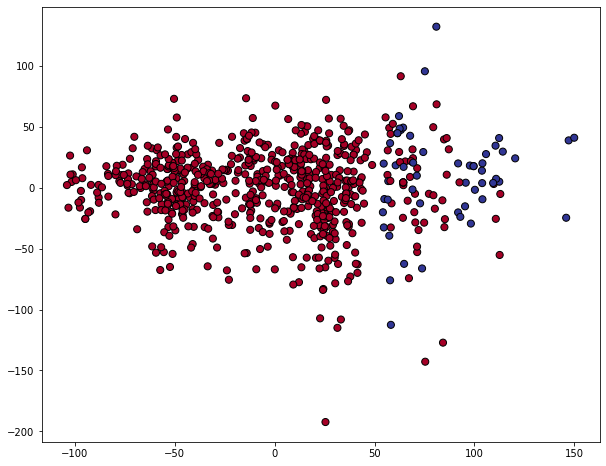

On compressed data KNN guessed 91.25% Pokemon
On compressed data DT guessed 95.0% Pokemon
On compressed data LR guessed 93.75% Pokemon
On compressed data LR guessed 95.0% Pokemon
On compressed data RF guessed 92.5% Pokemon


In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=6)
value_train = poke_train.iloc[:,5:11]
value_test = poke_test.iloc[:,5:11]
train_legendary = poke_train.iloc[:,12]
test_legendary = poke_test.iloc[:,12]

value_train = value_train - value_train.mean()
value_test = value_test - value_test.mean()

train_poke_new = pca.fit_transform(value_train).T

print(train_poke_new.shape) # this should be (784, 2000)

visualise_train = pd.DataFrame({'PC1':np.array(train_poke_new)[0], 'PC2':(-1*np.array(train_poke_new)[1])})

cm = plt.cm.get_cmap('RdYlBu')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

plt.scatter(visualise_train.PC1, visualise_train.PC2, s=50, edgecolors = 'black', cmap=cm, c=train_legendary)
plt.show()

variances = pca.explained_variance_ratio_
com_vars =  np.array([(np.sum(variances[:i])) for i in np.arange(len(variances))])
#print(com_vars)
n_pc = np.min(np.where(com_vars > 0.9))
#print(n_pc)

model = KNeighborsClassifier()
model.fit(train_poke_new[0:n_pc,:].T, train_legendary)

# Perform PCA using eigenvectors from the train data 
pca_eigenvectors = pca.components_
#print(pca_eigenvectors)
test_poke_new = np.dot((pca_eigenvectors), np.matrix(value_test).T)
#print(test_poke_new.shape)
val_predict = model.predict(test_poke_new.T[:,0:n_pc])
#print(val_predict)
#print(test_legendary)
#print(val_predict)
n_correct = sum(val_predict == test_legendary)

print(f'On compressed data KNN guessed {n_correct/test_legendary.shape[0]*100}% Pokemon')


model = DecisionTreeClassifier()
model.fit(train_poke_new[0:n_pc,:].T, train_legendary)

pca_eigenvectors = pca.components_
test_poke_new = np.dot((pca_eigenvectors), np.matrix(value_test).T)
val_predict = model.predict(test_poke_new.T[:,:n_pc])
n_correct = sum(val_predict == test_legendary)


print(f'On compressed data DT guessed {n_correct/test_legendary.shape[0]*100}% Pokemon')


model = LogisticRegression()
model.fit(train_poke_new[0:n_pc,:].T, train_legendary)

pca_eigenvectors = pca.components_
test_poke_new = np.dot((pca_eigenvectors), np.matrix(value_test).T)
val_predict = model.predict(test_poke_new.T[:,:n_pc])
n_correct = sum(val_predict == test_legendary)

print(f'On compressed data LR guessed {n_correct/test_legendary.shape[0]*100}% Pokemon')


model = AdaBoostClassifier()
model.fit(train_poke_new[0:n_pc,:].T, train_legendary)

pca_eigenvectors = pca.components_
test_poke_new = np.dot((pca_eigenvectors), np.matrix(value_test).T)
val_predict = model.predict(test_poke_new.T[:,:n_pc])
n_correct = sum(val_predict == test_legendary)

print(f'On compressed data LR guessed {n_correct/test_legendary.shape[0]*100}% Pokemon')


model = RandomForestClassifier()
model.fit(train_poke_new[0:n_pc,:].T, train_legendary)

pca_eigenvectors = pca.components_
test_poke_new = np.dot((pca_eigenvectors), np.matrix(value_test).T)
val_predict = model.predict(test_poke_new.T[:,:n_pc])
n_correct = sum(val_predict == test_legendary)

print(f'On compressed data RF guessed {n_correct/test_legendary.shape[0]*100}% Pokemon')


All of these models are still similarly accurate. All of them have at least near a 90% accuracy if not more when predicting legendary Pokemon. 

However lets have a look at the AUC of the original non-PCA versions of the models when using all the variables to see if the models are actually as good as they seem when predicting what Pokemon is legendary and what is not.

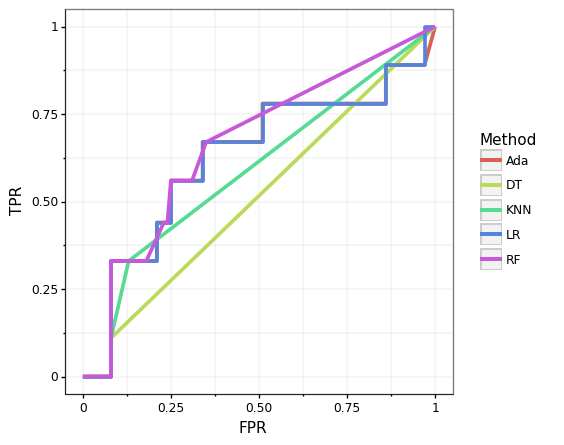

<ggplot: (-9223363272281803772)>

In [56]:
val = pd.DataFrame(columns=['KNN', 'DT', 'LR', 'Ada', 'RF'])

val['KNN'] = KNN.predict_proba(poke_test[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])[:,1]
val['DT'] = DT.predict_proba(poke_test[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])[:,1]
val['LR'] = LR.predict_proba(poke_test[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])[:,1]
val['Ada'] = Ada.predict_proba(poke_test[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])[:,1]
val['RF'] = RF.predict_proba(poke_test[['HP','Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']])[:,1]

val = val.sort_values('KNN',  ascending=False) # do not change this line
knn_roc_coordinates = generate_coordinates(val['KNN'], poke_test['Legendary'], verbose = False)

val = val.sort_values('DT',  ascending=False)
dt_roc_coordinates = generate_coordinates(val['DT'], poke_test['Legendary'], verbose = False)

val = val.sort_values('LR',  ascending=False)
lr_roc_coordinates = generate_coordinates(val['LR'], poke_test['Legendary'], verbose = False)

val = val.sort_values('Ada',  ascending=False)
ada_roc_coordinates = generate_coordinates(val['Ada'], poke_test['Legendary'], verbose = False)

val = val.sort_values('RF',  ascending=False)
rf_roc_coordinates = generate_coordinates(val['RF'], poke_test['Legendary'], verbose = False)

top_row =  pd.DataFrame({'FPR':0, 'TPR':0}, index=[1.0])

final_knn_roc_coordinates = pd.concat([top_row, knn_roc_coordinates])
final_knn_roc_coordinates = final_knn_roc_coordinates.astype('float') 

final_dt_roc_coordinates = pd.concat([top_row, dt_roc_coordinates])
final_dt_roc_coordinates = final_dt_roc_coordinates.astype('float') 

final_lr_roc_coordinates = pd.concat([top_row, lr_roc_coordinates])
final_lr_roc_coordinates = final_lr_roc_coordinates.astype('float') 

final_ada_roc_coordinates = pd.concat([top_row, ada_roc_coordinates])
final_ada_roc_coordinates = final_ada_roc_coordinates.astype('float') 

final_rf_roc_coordinates = pd.concat([top_row, rf_roc_coordinates])
final_rf_roc_coordinates = final_rf_roc_coordinates.astype('float') 

plot_roc(dict({'KNN': final_knn_roc_coordinates,
               'DT': final_dt_roc_coordinates,
               'LR': final_lr_roc_coordinates,
               'Ada': final_ada_roc_coordinates,
               'RF': final_rf_roc_coordinates}))



In [57]:
print(f"AUC of KNN is {np.round(metrics.roc_auc_score(poke_test['Legendary'], val['KNN']),3)}")
print(f"AUC of DT is {np.round(metrics.roc_auc_score(poke_test['Legendary'], val['DT']),3)}")
print(f"AUC of LR is {np.round(metrics.roc_auc_score(poke_test['Legendary'], val['LR']),3)}")
print(f"AUC of Ada is {np.round(metrics.roc_auc_score(poke_test['Legendary'], val['Ada']),3)}")
print(f"AUC of RF is {np.round(metrics.roc_auc_score(poke_test['Legendary'], val['RF']),3)}")

AUC of KNN is 0.604
AUC of DT is 0.577
AUC of LR is 0.582
AUC of Ada is 0.631
AUC of RF is 0.66


From the AUC it turns out none of the model's are as good as they seemed when predicting whether a Pokemon is legendary or not. We believe this is because the model can easily identify most non-legendary Pokemons however when it comes to Stronger pokemon it can not make the difference very well. Same we can see from Figure 6 and results that there is 48 non-legendary Pokemons that have at least same or higher total score than minimal legendary Pokemons total score. However the best model out of the 5 seems to be the RF model.

# Conclusion

During the project we tried to find best model and best combination of variables to predict Pokemon type and legendary status. From results we found out that there is no specific model and combination of variables that could outperform others. Main reason is that there is very few legendary Pokemons (only 8.125%) compared to non-legendary and models can predict well when Pokemon is non-legendary, but in region where there are also legendary Pokemons we flip a coin for decision (in reality results were a little better but not much).